# To predict diabetes using PIMA diabetes data

### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
import pickle
import math
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv("./data/pima-data.csv")

In [3]:
data.shape

(768, 9)

In [4]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
# check if any null value is present
data.isnull().values.any()

False

# Analyzing the dataset

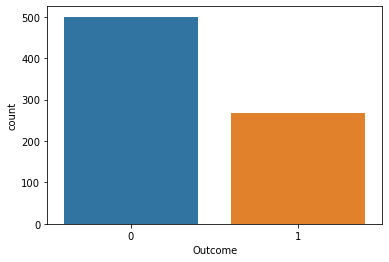

In [11]:
sns.countplot(data.Outcome)
plt.show()

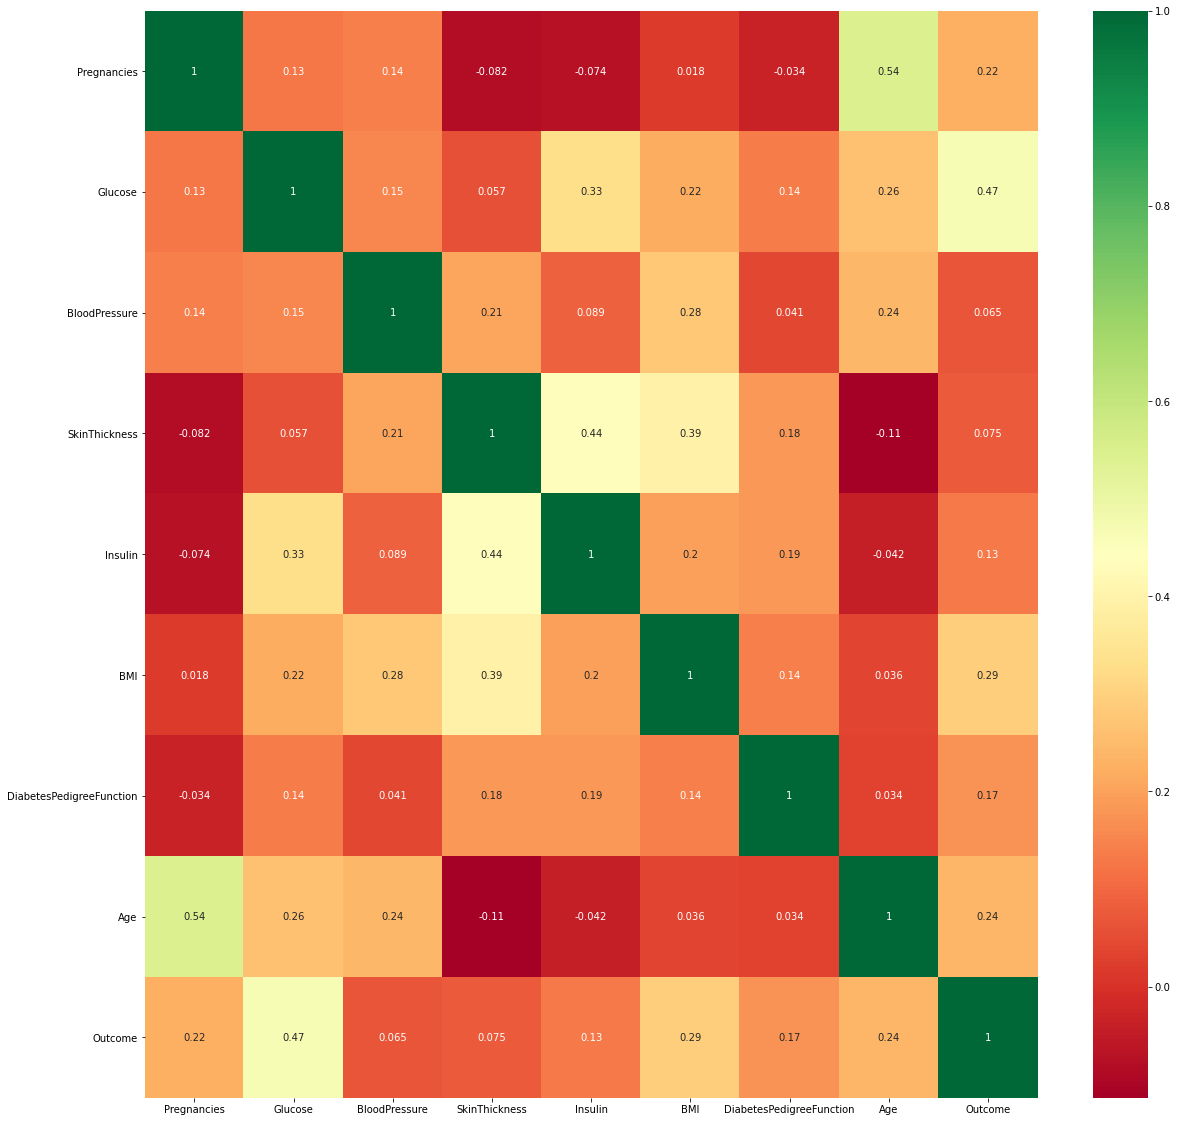

In [12]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [13]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [14]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
diabetes_true_count = len(data.loc[data['Outcome'] == True])
diabetes_false_count = len(data.loc[data['Outcome'] == False])

In [16]:
(diabetes_true_count,diabetes_false_count)

(268, 500)

In [17]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

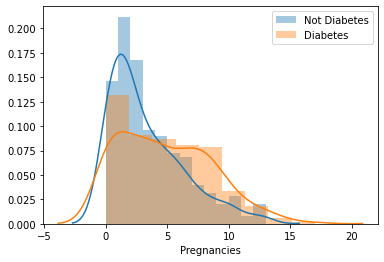

In [18]:
sns.distplot(data.Pregnancies[data.Outcome==0])
sns.distplot(data.Pregnancies[data.Outcome==1])
plt.legend(['Not Diabetes','Diabetes'])
plt.show()

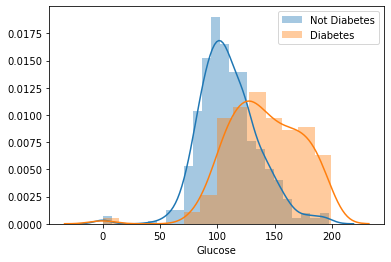

In [19]:
sns.distplot(data.Glucose [data.Outcome==0])
sns.distplot(data.Glucose [data.Outcome==1])
plt.legend(['Not Diabetes','Diabetes'])
plt.show()

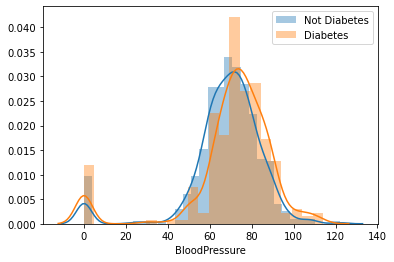

In [20]:
sns.distplot(data.BloodPressure  [data.Outcome==0])
sns.distplot(data.BloodPressure  [data.Outcome==1])
plt.legend(['Not Diabetes','Diabetes'])
plt.show()

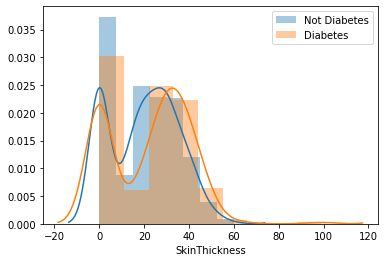

In [21]:
sns.distplot(data.SkinThickness  [data.Outcome==0])
sns.distplot(data.SkinThickness  [data.Outcome==1])
plt.legend(['Not Diabetes','Diabetes'])
plt.show()

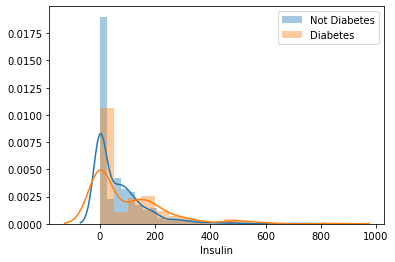

In [22]:
sns.distplot(data.Insulin   [data.Outcome==0])
sns.distplot(data.Insulin   [data.Outcome==1])
plt.legend(['Not Diabetes','Diabetes'])
plt.show()

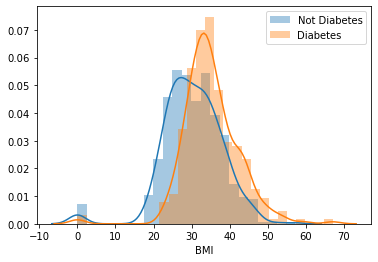

In [23]:
sns.distplot(data.BMI   [data.Outcome==0])
sns.distplot(data.BMI   [data.Outcome==1])
plt.legend(['Not Diabetes','Diabetes'])
plt.show()

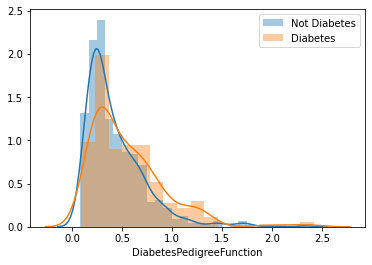

In [24]:
sns.distplot(data.DiabetesPedigreeFunction    [data.Outcome==0])
sns.distplot(data.DiabetesPedigreeFunction   [data.Outcome==1])
plt.legend(['Not Diabetes','Diabetes'])
plt.show()

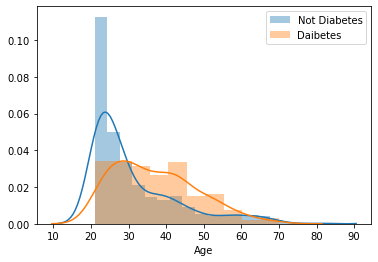

In [25]:
sns.distplot(data.Age[data.Outcome==0])
sns.distplot(data.Age[data.Outcome==1])
plt.legend(['Not Diabetes','Daibetes'])
plt.show()

In [26]:
#sns.pairplot(data=data,hue='Outcome',diag_kind='kde')
#plt.show()

In [27]:
## Train Test Split

from sklearn.model_selection import train_test_split
feature_columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
predicted_class = ['Outcome']
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
X = data.iloc[:,:8].values
y = data.iloc[:,-1].values

In [29]:
X = data[feature_columns].values
y = data[predicted_class].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [30]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [32]:
#build the logisticRegression model
log_reg = LogisticRegression()
# fit the model with data
log_reg.fit(X,y)

C:\Users\nadim\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\nadim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
#testing the build model 
test=[[6,148,72,35,0,33.6,0.627,50]]
print(test)

print(log_reg.predict_proba(test))
print(log_reg.predict(test))  # pass
print(log_reg.predict([[1,148,72,35,0,33.6,0.627,50]])) #fail

[[6, 148, 72, 35, 0, 33.6, 0.627, 50]]
[[0.28902542 0.71097458]]
[1]
[1]


In [34]:
## Apply Algorithm

from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=10)

In [35]:
predict_train_data = random_forest_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.2f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.74


In [36]:
# Saving model to disk
#Serialization  - saving the state (in memory) to file (on disk)
pickle.dump(log_reg,open('model.pkl','wb'))

# Loading model to compare the results
#Deserialization  - reteriving  the file (on disk) to memory (RAM)
model=pickle.load(open('model.pkl','rb'))
print(model.predict_proba([[6,148,72,35,0,33.6,0.627,50]]))
print(model.predict([[6,148,72,35,0,33.6,0.627,50]]))


[[0.28902542 0.71097458]]
[1]


In [37]:
# Saving model to disk
#Serialization  - saving the state (in memory) to file (on disk)
pickle.dump(random_forest_model,open('model1.pkl','wb'))

# Loading model to compare the results
#Deserialization  - reteriving  the file (on disk) to memory (RAM)
model=pickle.load(open('model1.pkl','rb'))
print(model.predict_proba([[6,148,72,35,0,33.6,0.627,50]]))
print(model.predict([[4,148,72,35,0,33.6,0.627,50]]))

[[0.36 0.64]]
[1]


In [ ]:
#app.py
from flask import Flask,request, url_for, redirect, render_template
import pickle
import numpy as np

app = Flask(__name__)
model=pickle.load(open('model.pkl','rb'))

@app.route('/')
def home():
    return render_template("index.html")

@app.route('/predict',methods=['POST','GET'])
def predict():
    # receive the values send by user in three text boxes thru request object -> requesst.form.values()
    
    int_features = [int(x) for x in request.form.values()]
    final_features = [np.array(int_features)]
    #print(final_features)
    #prediction = model.predict(final_features)
    #output = round(prediction[0], 2)
    
    prediction=model.predict_proba(final_features)
    output='{0:.{1}f}'.format(prediction[0][1], 2)
   
    #print(output )

    return render_template('index.html', pred='Probability of having Diabetes is :  {}'.format(output))

if __name__ == '__main__':
    app.run(debug=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [17/Nov/2020 12:48:51] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/Nov/2020 12:48:51] "GET /static/https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-awesome.min.css HTTP/1.1" 404 -
127.0.0.1 - - [17/Nov/2020 12:48:52] "GET /static/css/bootstrap/bootstrap.min.css HTTP/1.1" 200 -
127.0.0.1 - - [17/Nov/2020 12:48:52] "GET /static/css/owl-carousel/owl.theme.default.min.css HTTP/1.1" 200 -
127.0.0.1 - - [17/Nov/2020 12:48:52] "GET /static/css/magnific-popup/magnific-popup.css HTTP/1.1" 200 -
127.0.0.1 - - [17/Nov/2020 12:48:52] "GET /static/css/owl-carousel/owl.carousel.min.css HTTP/1.1" 200 -
127.0.0.1 - - [17/Nov/2020 12:48:52] "GET /static/js/tabs/tab.custom.js HTTP/1.1" 404 -
127.0.0.1 - - [17/Nov/2020 12:48:52] "GET /static/css/responsive.css HTTP/1.1" 200 -
127.0.0.1 - - [17/Nov/2020 12:48:52] "GET /static/css/animate/animate.css HTTP/1.1" 200 -
127.0.0.1 - - [17/Nov/2020 12:48:52] "GET /static/css